## 그룹연산
### 데이터 필터링

In [1]:
import seaborn as sns

tips_10 = sns.load_dataset('tips').sample(10, random_state=42)
print(tips_10)

     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153       24.55  2.00    Male     No   Sun  Dinner     4
211       25.89  5.16    Male    Yes   Sat  Dinner     4
198       13.00  2.00  Female    Yes  Thur   Lunch     2
176       17.89  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [3]:
grouped = tips_10.groupby('sex')
print(grouped)

In [4]:
print(grouped.groups)

{'Male': [24, 6, 153, 211, 176, 192, 9], 'Female': [198, 124, 101]}


In [5]:
args = grouped.mean()
print(args)

        total_bill       tip      size
sex                                   
Male         20.02  2.875714  2.571429
Female       13.62  2.506667  2.000000


C:\Users\user\AppData\Local\Temp\ipykernel_1928\1148611690.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  args = grouped.mean()


In [6]:
print(tips_10.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [8]:
female = grouped.get_group('Female')
print(female)

     total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [9]:
for sex_group in grouped:
    print(sex_group)

('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2)
('Female',      total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2)


In [12]:
for sex_group in grouped:
    print('the type is : {}\n'.format(type(sex_group)))
    print('the length is : {}\n'.format(len(sex_group)))
    
    first_element = sex_group[0]
    
    print('the first element is : {}\n'.format(first_element))
    print('it has a type of : {}\n'.format(type(sex_group[0])))
    
    second_element = sex_group[1]
    print('the second element is : {}\n'.format(second_element))
    print('it has a type of : {}\n'.format(type(second_element)))
    
    print('what we have: ')
    print(sex_group)
    
    #break

the type is : <class 'tuple'>

the length is : 2

the first element is : Male

it has a type of : <class 'str'>

the second element is :      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2

it has a type of : <class 'pandas.core.frame.DataFrame'>

what we have: 
('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       

In [14]:
bill_sex_time = tips_10.groupby(['sex','time'])
group_avg = bill_sex_time.mean() 

print(group_avg)

               total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000


C:\Users\user\AppData\Local\Temp\ipykernel_1928\1464404005.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_avg = bill_sex_time.mean()


In [15]:
print(group_avg.index)

MultiIndex([(  'Male',  'Lunch'),
            (  'Male', 'Dinner'),
            ('Female',  'Lunch'),
            ('Female', 'Dinner')],
           names=['sex', 'time'])


In [17]:
group_method = tips_10.groupby(['sex','time']).mean().reset_index()
print(group_method)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


C:\Users\user\AppData\Local\Temp\ipykernel_1928\3042830927.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_method = tips_10.groupby(['sex','time']).mean().reset_index()


In [18]:
group_param = tips_10.groupby(['sex','time'],as_index=False).mean()
print(group_param)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


C:\Users\user\AppData\Local\Temp\ipykernel_1928\4034113434.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_param = tips_10.groupby(['sex','time'],as_index=False).mean()


## 시계열 데이터

In [19]:
from datetime import datetime

In [20]:
now1 = datetime.now()
print(now1)

2023-08-10 11:25:06.707705


In [21]:
now2 = datetime.today()
print(now2)

2023-08-10 11:25:27.436503


In [22]:
t1 = datetime.now()
t2 = datetime(1970,1,1)
t3 = datetime(1970,12,12,13,24,34)

print(t1)
print(t2)
print(t3)

2023-08-10 13:35:10.386497
1970-01-01 00:00:00
1970-12-12 13:24:34


In [23]:
diff1 = t1-t2

print(diff1)
print(type(diff1))

19579 days, 13:35:10.386497
<class 'datetime.timedelta'>


In [25]:
diff2 = t2 - t1

print(diff2)
print(type(diff2))

-19580 days, 10:24:49.613503
<class 'datetime.timedelta'>


In [28]:
import pandas as pd
import os

ebola = pd.read_csv('./data/country_timeseries.csv')
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [30]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [33]:
test_df1 = pd.DataFrame({'order_day':['01/01/15','02/01/15','01/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format = '%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format = '%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format = '%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  01/01/15 2015-01-01 2015-01-01 2001-01-15


In [34]:
now = datetime.now()
print(now)

2023-08-10 14:13:18.953415


In [35]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2023-08-10


In [37]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

14:13:18


In [38]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2023-08-10 14:13:18


In [41]:
ebola = pd.read_csv('./data/country_timeseries.csv', parse_dates = ['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [43]:
date_series = pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [46]:
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


In [48]:
ebola = pd.read_csv('./data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [50]:
print(ebola[['Date', 'date_dt']].head())

print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31
2015
1
2


In [51]:
ebola['year'] = ebola['date_dt'].dt.year

print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [53]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)

print(ebola[['Date','date_dt','year','month','day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [56]:
ebola['month'], ebola['day'] = ebola['date_dt'].dt.month,ebola['date_dt'].dt.day
print(ebola[['Date','date_dt','year','month','day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [58]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [60]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [62]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt']))

2014-03-22 00:00:00
<class 'pandas.core.series.Series'>


In [64]:
banks = pd.read_csv('./data/banklist.csv', parse_dates = [5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


In [70]:
banks['closing_quater'], banks['closing_year'] = \
(banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quater  closing_year  
0               4          2017  
1               4          2017  
2       

In [72]:
closing_year = banks.groupby('closing_year').size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [73]:
closing_year_q = banks.groupby(['closing_year','closing_quater']).size()
print(closing_year_q)

closing_year  closing_quater
2000          4                  2
2001          1                  1
              2                  1
              3                  2
2002          1                  6
              2                  2
              3                  1
              4                  2
2003          1                  1
              2                  1
              4                  1
2004          1                  3
              2                  1
2007          1                  1
              3                  1
              4                  1
2008          1                  2
              2                  2
              3                  9
              4                 12
2009          1                 21
              2                 24
              3                 50
              4                 45
2010          1                 41
              2                 45
              3                 41
              4           

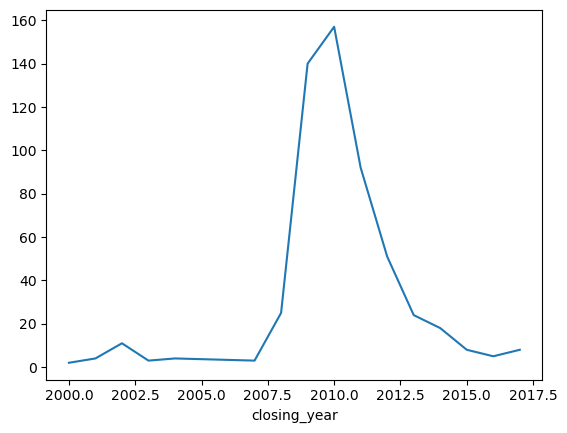

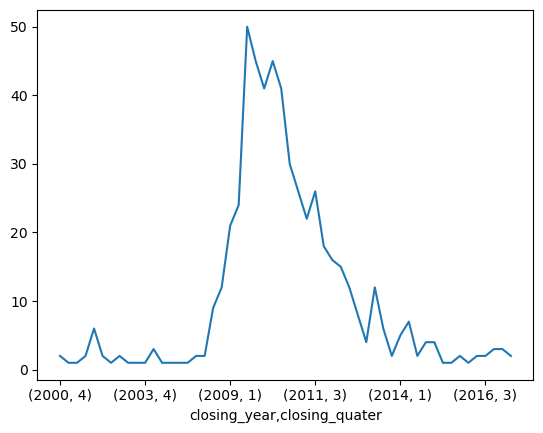

In [75]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()